Dataset Titanic, dengan target variable survive atau tidak.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Data Preprocessing**

In [5]:
#checking null data

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data[data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [3]:
#input data for null data in column 'Age' dengan median
data.loc[data['Age'].isnull(), 'Age'] = data['Age'].median()

In [5]:
#check duplicate data
data.duplicated().sum()

0

In [4]:
# engineering column 'Sex'
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True


In [5]:
data['Sex_male'] = data['Sex_male'].astype(int)
data.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [6]:
# define X & y
X = data[['Pclass','Age','SibSp','Parch','Fare','Sex_male']]
y = data['Survived']

**Train - Test Split**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# split dataset
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=35)

In [9]:
# scaling
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [11]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male
465,3,38.0,0,0,7.0500,1
202,3,34.0,0,0,6.4958,1
317,2,54.0,0,0,14.0000,1


In [12]:
X_train_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0.820268,0.680467,-0.473165,-0.470393,-0.507031,0.713074
1,0.820268,0.366354,-0.473165,-0.470393,-0.518447,0.713074
2,-0.386407,1.936918,-0.473165,-0.470393,-0.363866,0.713074
3,-1.593083,1.544277,0.377576,-0.470393,0.520444,0.713074
4,-1.593083,2.722199,0.377576,4.722159,4.765351,0.713074


Library Machine Learning

In [13]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [20]:
# evaluation metrics
def classification_eval (aktual, prediksi, name):
  cm = confusion_matrix(aktual, prediksi)
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]

  accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
  precision = round((tp) / (tp+fp) * 100, 2)
  recall = round((tp) / (tp+fn) * 100, 2)

  print('Evaluation Model:', name)
  print(cm)
  print('Accuracy   :', accuracy, '%')
  print('Precision  :', precision, '%')
  print('Recall     :', recall, '%')


KNN

Find optimal value of K

In [22]:
error_rate = []
#will take some time
for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

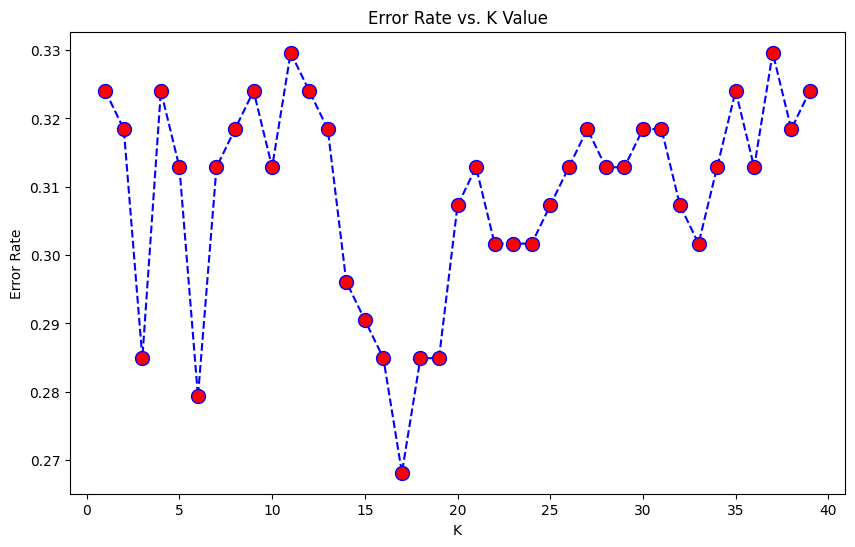

In [25]:
# Plot error rate untuk berbagai nilai k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [24]:
# Mencari nilai K dengan error rate terendah
optimal_k = range(1, 40)[np.argmin(error_rate)]
print(f"The optimal number of neighbors is {optimal_k} with an error rate of {min(error_rate)}")

The optimal number of neighbors is 17 with an error rate of 0.2681564245810056


In [38]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

In [39]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [40]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[405  38]
 [ 73 196]]
Accuracy   : 84.41 %
Precision  : 83.76 %
Recall     : 72.86 %


In [ ]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

**Decision Tree**


Find Optimal parameter

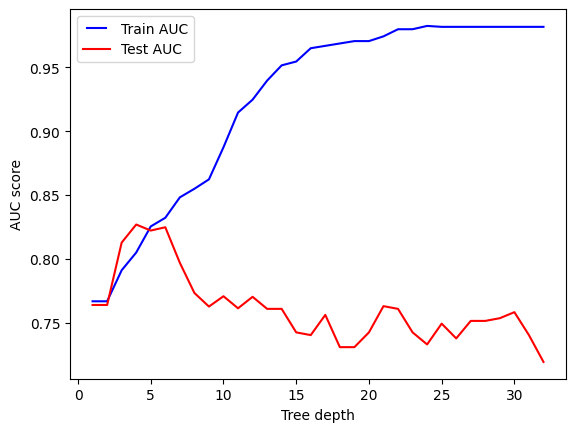

In [19]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
  dt = DecisionTreeClassifier(max_depth=int(max_depth))
  dt.fit(X_train, y_train)
  train_pred = dt.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  # add auc score to previous train results
  train_results.append(roc_auc)
  y_pred = dt.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  # add auc score to prevous test results
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()




In [20]:
# Mencari depth dengan AUC tertinggi pada data uji
optimal_depth = max_depths[np.argmax(test_results)]
print(f"The optimal tree depth is {optimal_depth} with a test AUC of {max(test_results)}")

The optimal tree depth is 4.0 with a test AUC of 0.8269578702507108


In [32]:
dectree = DecisionTreeClassifier(max_depth=4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [33]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [34]:
pd.DataFrame(y_test_pred, columns=['Survived'])

,Survived
0,0
1,1
2,1
3,0
4,1
...,...
174,0
175,0
176,0
177,0


In [35]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')


Evaluation Model: Decision Tree Training
[[402  41]
 [ 80 189]]
Accuracy   : 83.01 %
Precision  : 82.17 %
Recall     : 70.26 %


In [36]:
classification_eval(y_test, y_test_pred, 'Decision Tree Test')


Evaluation Model: Decision Tree Test
[[94 12]
 [17 56]]
Accuracy   : 83.8 %
Precision  : 82.35 %
Recall     : 76.71 %


**Random Forest**

In [37]:
ranfor = RandomForestClassifier(max_depth=4)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [38]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [39]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')


Evaluation Model: Random Forest Training
[[408  35]
 [ 81 188]]
Accuracy   : 83.71 %
Precision  : 84.3 %
Recall     : 69.89 %


In [40]:
classification_eval(y_test, y_test_pred, 'Random Forest Test')


Evaluation Model: Random Forest Test
[[93 13]
 [16 57]]
Accuracy   : 83.8 %
Precision  : 81.43 %
Recall     : 78.08 %


In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [17]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [21]:
classification_eval(y_train, y_train_pred, 'Logistic Regression Training')

Evaluation Model: Logistic Regression Training
[[377  66]
 [ 81 188]]
Accuracy   : 79.35 %
Precision  : 74.02 %
Recall     : 69.89 %


In [22]:
classification_eval(y_test, y_test_pred, 'Logistic Regression Test')

Evaluation Model: Logistic Regression Test
[[84 22]
 [17 56]]
Accuracy   : 78.21 %
Precision  : 71.79 %
Recall     : 76.71 %
